# Extracción de datos

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

with open("TelecomX_Data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.json_normalize(data)

# Trasformación de datos

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

columnas más relevantes para el análisis de evasión (Churn)

* tenure → tiempo que lleva el cliente.
* Contract → tipo de contrato.
* Charges.Monthly → gasto mensual.
* Charges.Total → gasto total.
*InternetService, OnlineSecurity, TechSupport → relación directa con servicios contratados.
* PaymentMethod → forma de pago, puede influir en cancelaciones.
* PaperlessBilling → si usa o no facturación electrónica.

Comprobación de inconsistencias en los datos

In [28]:
print("Valores ausentes por columna:")
print(df.isnull().sum())

Valores ausentes por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
Cuentas_Diarias              0
dtype: int64


In [5]:
print(f"Cantidad de filas duplicadas: {df.duplicated().sum()}")

Cantidad de filas duplicadas: 0


In [27]:
columnas_numericas = [
    "customer.SeniorCitizen", "customer.tenure",
    "account.Charges.Monthly", "account.Charges.Total"
]

for col in columnas_numericas:
    errores = pd.to_numeric(df[col], errors='coerce').isnull().sum()
    print(f"Errores de formato en {col}: {errores}")

# account.Charges.Total muestra un total de 11 datos vacios

Errores de formato en customer.SeniorCitizen: 0
Errores de formato en customer.tenure: 0
Errores de formato en account.Charges.Monthly: 0
Errores de formato en account.Charges.Total: 11


In [86]:
validas = {
    'Churn': ['Yes', 'No'],
    'customer.gender': ['Male', 'Female'],
    'customer.Partner': ['Yes', 'No'],
    'customer.Dependents': ['Yes', 'No'],
    'phone.PhoneService': ['Yes', 'No'],
    'phone.MultipleLines': ['Yes', 'No', 'No phone service'],
    'internet.InternetService': ['DSL', 'Fiber optic', 'No'],
    'internet.OnlineSecurity': ['Yes', 'No', 'No internet service'],
    'internet.OnlineBackup': ['Yes', 'No', 'No internet service'],
    'internet.DeviceProtection': ['Yes', 'No', 'No internet service'],
    'internet.TechSupport': ['Yes', 'No', 'No internet service'],
    'internet.StreamingTV': ['Yes', 'No', 'No internet service'],
    'internet.StreamingMovies': ['Yes', 'No', 'No internet service'],
    'account.Contract': ['Month-to-month', 'One year', 'Two year'],
    'account.PaperlessBilling': ['Yes', 'No']
}

for c, v in validas.items():
    if c in df:
        inv = set(df[c].dropna()) - set(v)
        if inv:
            print(f"Inconsistencias en {c}: {inv}")

In [99]:
filas, columnas = df[df['Churn'] == ''].shape
print(f"{filas} rows × {columnas} columns")

# Churn muestra un total de 224 datos vacios

0 rows × 22 columns


Manejo de inconsistencias ✅


In [100]:
# Eliminamos los datos vacios de account.Charges.Total
df = df.dropna(subset=['account.Charges.Total'])
print("Valores ausentes en account.Charges.Total:", df['account.Charges.Total'].isna().sum())

Valores ausentes en account.Charges.Total: 0


In [101]:
# Eliminamos los datos vacios de Churn
df = df[df['Churn'] != '']

filas, columnas = df[df['Churn'] == ''].shape
print(f"{filas} rows × {columnas} columns")

0 rows × 22 columns


Creación columna de cuentas diarias

In [90]:
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30
print(df[['account.Charges.Monthly', 'Cuentas_Diarias']].head(10))


   account.Charges.Monthly  Cuentas_Diarias
0                    65.60         2.186667
1                    59.90         1.996667
2                    73.90         2.463333
3                    98.00         3.266667
4                    83.90         2.796667
5                    69.40         2.313333
6                   109.70         3.656667
7                    84.65         2.821667
8                    48.20         1.606667
9                    90.45         3.015000


Estandarización y transformación de datos

In [58]:
binarias = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']
df[binarias] = df[binarias].replace({'Yes': 1, 'No': 0})

for col in binarias:
    print(f"{col}:\n{df[col].value_counts(dropna=False)}\n")

Churn:
Churn
0    5163
1    1869
Name: count, dtype: int64

customer.Partner:
customer.Partner
0    3639
1    3393
Name: count, dtype: int64

customer.Dependents:
customer.Dependents
0    4933
1    2099
Name: count, dtype: int64

phone.PhoneService:
phone.PhoneService
1    6352
0     680
Name: count, dtype: int64

account.PaperlessBilling:
account.PaperlessBilling
1    4168
0    2864
Name: count, dtype: int64



# Carga y análisis

In [64]:
numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']

df[numericas] = df[numericas].apply(pd.to_numeric,)

print("Estadísticas descriptivas de columnas numéricas:\n")
print(df[numericas].describe())

print("\nMediana de cada columna:")
print(df[numericas].median())

print("\nDesviación estándar de cada columna:")
print(df[numericas].std())





Estadísticas descriptivas de columnas numéricas:

       customer.tenure  account.Charges.Monthly  account.Charges.Total  \
count      7032.000000              7032.000000            7032.000000   
mean         32.421786                64.798208            2283.300441   
std          24.545260                30.085974            2266.771362   
min           1.000000                18.250000              18.800000   
25%           9.000000                35.587500             401.450000   
50%          29.000000                70.350000            1397.475000   
75%          55.000000                89.862500            3794.737500   
max          72.000000               118.750000            8684.800000   

       Cuentas_Diarias  
count      7032.000000  
mean          2.159940  
std           1.002866  
min           0.608333  
25%           1.186250  
50%           2.345000  
75%           2.995417  
max           3.958333  

Mediana de cada columna:
customer.tenure              29.

Distribución de evasión

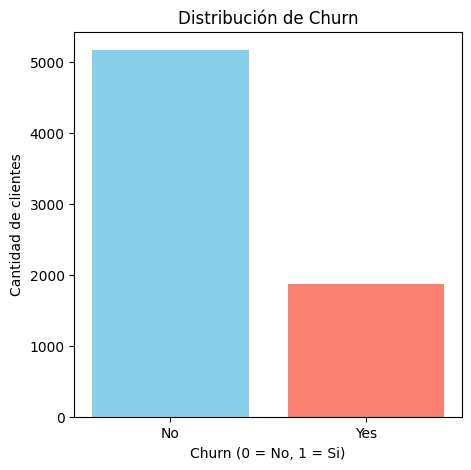

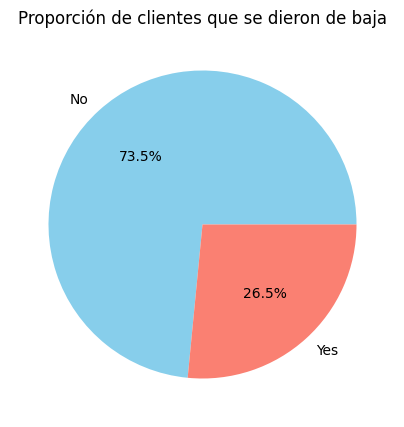

In [102]:
conteo_churn = df['Churn'].value_counts()

# Gráfico de barras
plt.figure(figsize=(5,5))
plt.bar(conteo_churn.index, conteo_churn.values, color=['skyblue', 'salmon'])
plt.title('Distribución de Churn')
plt.xlabel('Churn (0 = No, 1 = Si)')
plt.ylabel('Cantidad de clientes')
plt.show()

# Gráfico de pastel
plt.figure(figsize=(5,5))
plt.pie(conteo_churn.values, labels=conteo_churn.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Proporción de clientes que se dieron de baja')
plt.show()

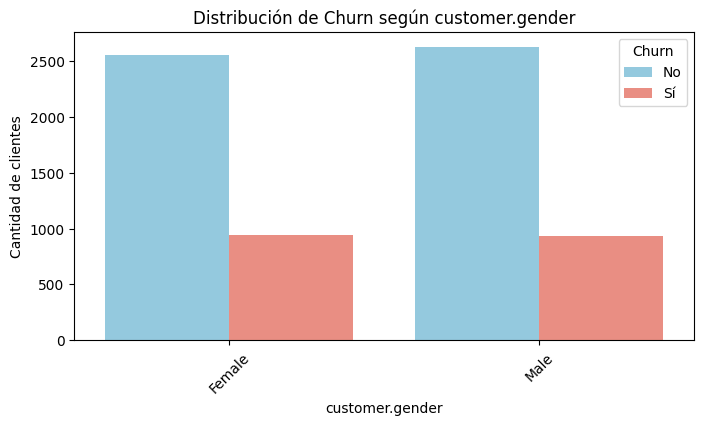


Proporción de Churn por customer.gender (%):
 Churn                   No        Yes
customer.gender                      
Female           73.079128  26.920872
Male             73.839662  26.160338 



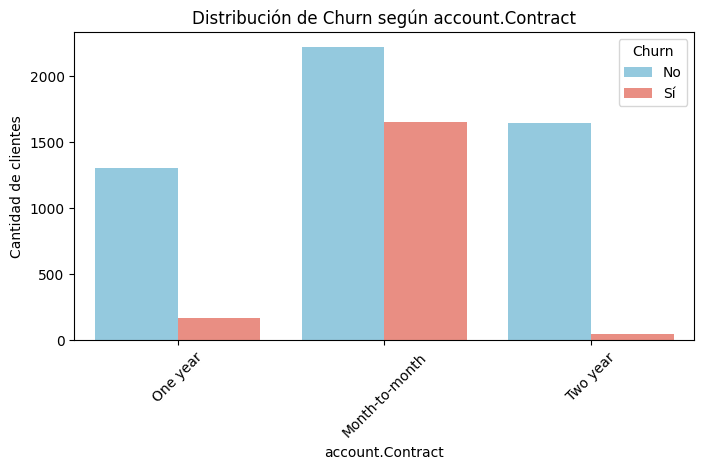


Proporción de Churn por account.Contract (%):
 Churn                    No        Yes
account.Contract                      
Month-to-month    57.290323  42.709677
One year          88.730482  11.269518
Two year          97.168142   2.831858 



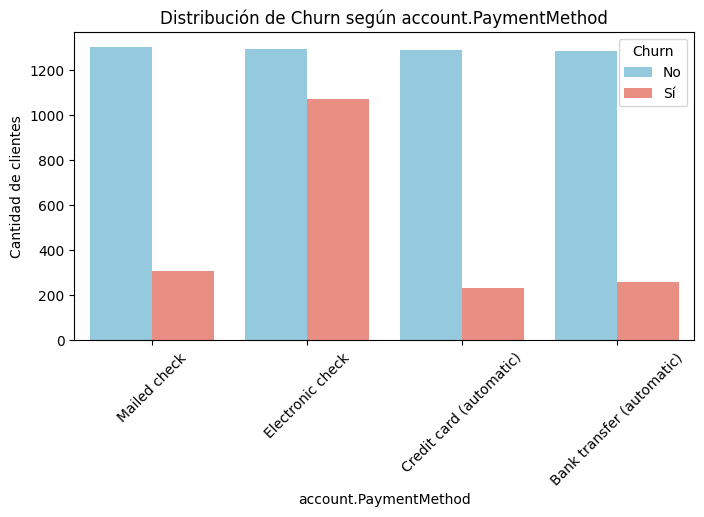


Proporción de Churn por account.PaymentMethod (%):
 Churn                             No        Yes
account.PaymentMethod                          
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700 



In [105]:
categoricas = ['customer.gender', 'account.Contract', 'account.PaymentMethod']

for col in categoricas:
    plt.figure(figsize=(8,4))
# Gráfico de barras mostrando proporción de Churn por categoría
    sns.countplot(data=df, x=col, hue='Churn', palette=['skyblue','salmon'])
    plt.title(f'Distribución de Churn según {col}')
    plt.ylabel('Cantidad de clientes')
    plt.xlabel(col)
    plt.legend(title='Churn', labels=['No', 'Sí'])
    plt.xticks(rotation=45)
    plt.show()

# Tabla de proporciones
    tabla_prop = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    print(f"\nProporción de Churn por {col} (%):\n", tabla_prop, "\n")



Conteo de evasión por variables numéricas

In [116]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

df = df.dropna(subset=['account.Charges.Total'])

print(df['account.Charges.Total'].dtype)

numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']

for col in numericas:
    print(f"\n--- Estadísticas de {col} según Churn ---")
    stats = df.groupby('Churn')[col].agg(['count','mean','median','std','min','max'])
    print(stats)


float64

--- Estadísticas de customer.tenure según Churn ---
       count       mean  median        std  min  max
Churn                                               
0       5163  37.650010    38.0  24.076940    1   72
1       1869  17.979133    10.0  19.531123    1   72

--- Estadísticas de account.Charges.Monthly según Churn ---
       count       mean  median        std    min     max
Churn                                                    
0       5163  61.307408   64.45  31.094557  18.25  118.75
1       1869  74.441332   79.65  24.666053  18.85  118.35

--- Estadísticas de account.Charges.Total según Churn ---
       count         mean   median          std    min      max
Churn                                                          
0       5163  2555.344141  1683.60  2329.456984  18.80  8672.45
1       1869  1531.796094   703.55  1890.822994  18.85  8684.80

--- Estadísticas de Cuentas_Diarias según Churn ---
       count      mean    median       std       min       max
Chu

/tmp/ipython-input-4281774546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')


#Informe

Informe de Análisis de Evasión de Clientes (Churn)

Introducción:
El objetivo de este análisis es comprender el comportamiento de los clientes de la empresa y detectar patrones asociados a la evasión (Churn). Analizando datos demográficos, de servicios y facturación, buscamos identificar factores que influyen en la cancelación de servicios y proporcionar insights que ayuden a reducir la pérdida de clientes.

Limpieza y Tratamiento de Datos:
Se realizaron los siguientes pasos:

Carga de datos: Se importaron los datos desde un archivo JSON y se convirtieron a un DataFrame de Pandas para su manipulación.

Revisión de tipos de datos: Se verificó el tipo de cada columna y se identificaron columnas numéricas y categóricas.

Identificación de errores:

Valores ausentes

Duplicados

Errores de formato (account.Charges.Total tenía 11 errores)

Inconsistencias en categorías (Churn tenía 224 valores vacíos)

Tratamiento:

Se eliminaron filas con valores problemáticos en account.Charges.Total.

Se estandarizaron columnas binarias (Sí/No → 1/0).

Se creó la columna Cuentas_Diarias a partir de la facturación mensual.

Análisis Exploratorio de Datos:

Distribución de Churn: La mayoría de los clientes permanecen en el servicio, pero existe un porcentaje de evasión relevante.

Variables categóricas: Se analizaron variables como género, pareja, dependientes, servicio telefónico y facturación en línea, observando diferencias en la tasa de evasión según cada categoría.

Variables numéricas: Se examinaron el tiempo de contrato, la facturación mensual, el total gastado y las cuentas diarias. Clientes con menor tiempo de contrato o facturación elevada muestran mayor riesgo de evasión.

Conclusiones e Insights:

La limpieza y estandarización de datos fue clave para obtener análisis confiables.

Variables como el tiempo de contrato y la facturación mensual están relacionadas con la probabilidad de evasión.

Los servicios adicionales pueden influir en la decisión de permanecer, evidenciando oportunidades para fidelizar clientes.

Recomendaciones:

Implementar estrategias de retención para clientes con menor tiempo de contrato o facturación elevada.

Ofrecer paquetes combinados o incentivos a clientes sin servicios adicionales que puedan aumentar su satisfacción y fidelización.

Monitorear periódicamente las métricas de Churn y actualizar modelos de predicción de evasión.

Continuar con la recolección y estandarización de datos para mejorar análisis futuros.